In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

sns.set_theme(font_scale=1.3)

np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris

all_data = load_iris(as_frame=True)
df = all_data.frame

feature_names = all_data['feature_names']
target_names = all_data['target_names']

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data = df.iloc[:, [2,1]].values
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[1.4 3.5]
 [1.4 3. ]
 [1.3 3.2]
 [1.5 3.1]
 [1.4 3.6]]

[0 0 0 0 0]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.svm import SVC

classifier = SVC(C=1.0, kernel='linear')

classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
classifier.score(X_test, y_test)

0.9736842105263158

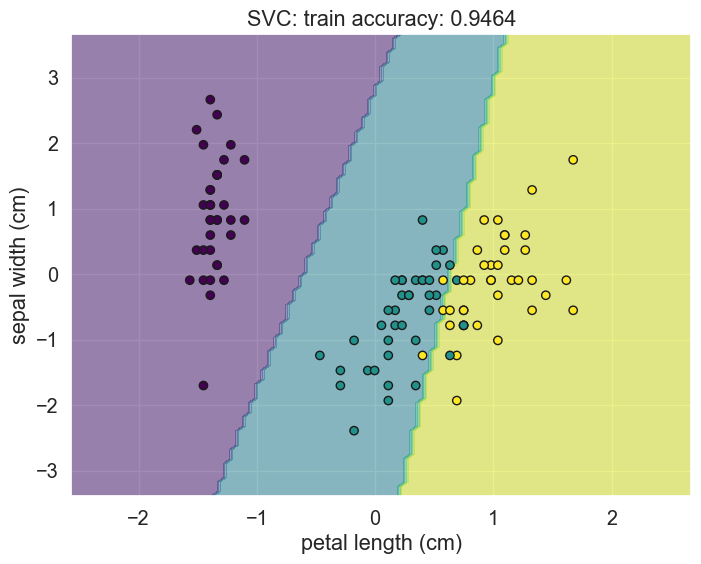

In [9]:
plt.figure(figsize=(8, 6))
ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    classifier,
    X_train,
    ax=ax,
    response_method="predict",
    cmap='viridis',  
    alpha=0.5,
    xlabel=feature_names[2],
    ylabel=feature_names[1]
)

plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    cmap='viridis',
    edgecolors='k'
)

plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

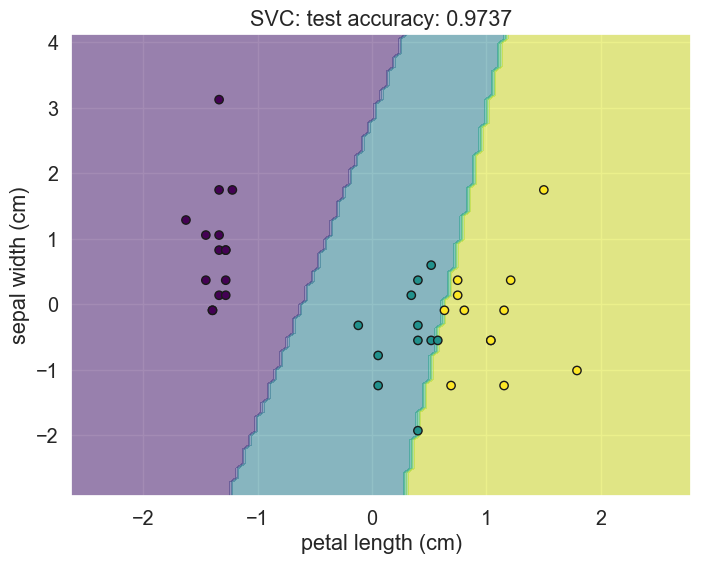

In [10]:
plt.figure(figsize=(8, 6))
ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    classifier,
    X_test,
    ax=ax,
    response_method="predict",
    cmap='viridis',  
    alpha=0.5,
    xlabel=feature_names[2],
    ylabel=feature_names[1]
)

plt.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
    cmap='viridis',
    edgecolors='k'
)

plt.title(f'SVC: test accuracy: {classifier.score(X_test, y_test):.4f}')
plt.show()